In [8]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import plot_state_city
import numpy as np

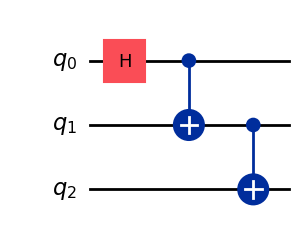

In [2]:
qc_ABC = QuantumCircuit(3)
qc_ABC.h(0)
qc_ABC.cx(0,1)
qc_ABC.cx(1,2)
qc_ABC.draw('mpl')

In [3]:
psi_ABC = qi.Statevector.from_instruction(qc_ABC)
psi_ABC.draw('latex', prefix='|\\psi_{ABC}\\rangle = ')

<IPython.core.display.Latex object>

In [4]:
rho_ABC = qi.DensityMatrix.from_instruction(qc_ABC)
rho_ABC.draw('latex', prefix='\\rho_{ABC} = ')

<IPython.core.display.Latex object>

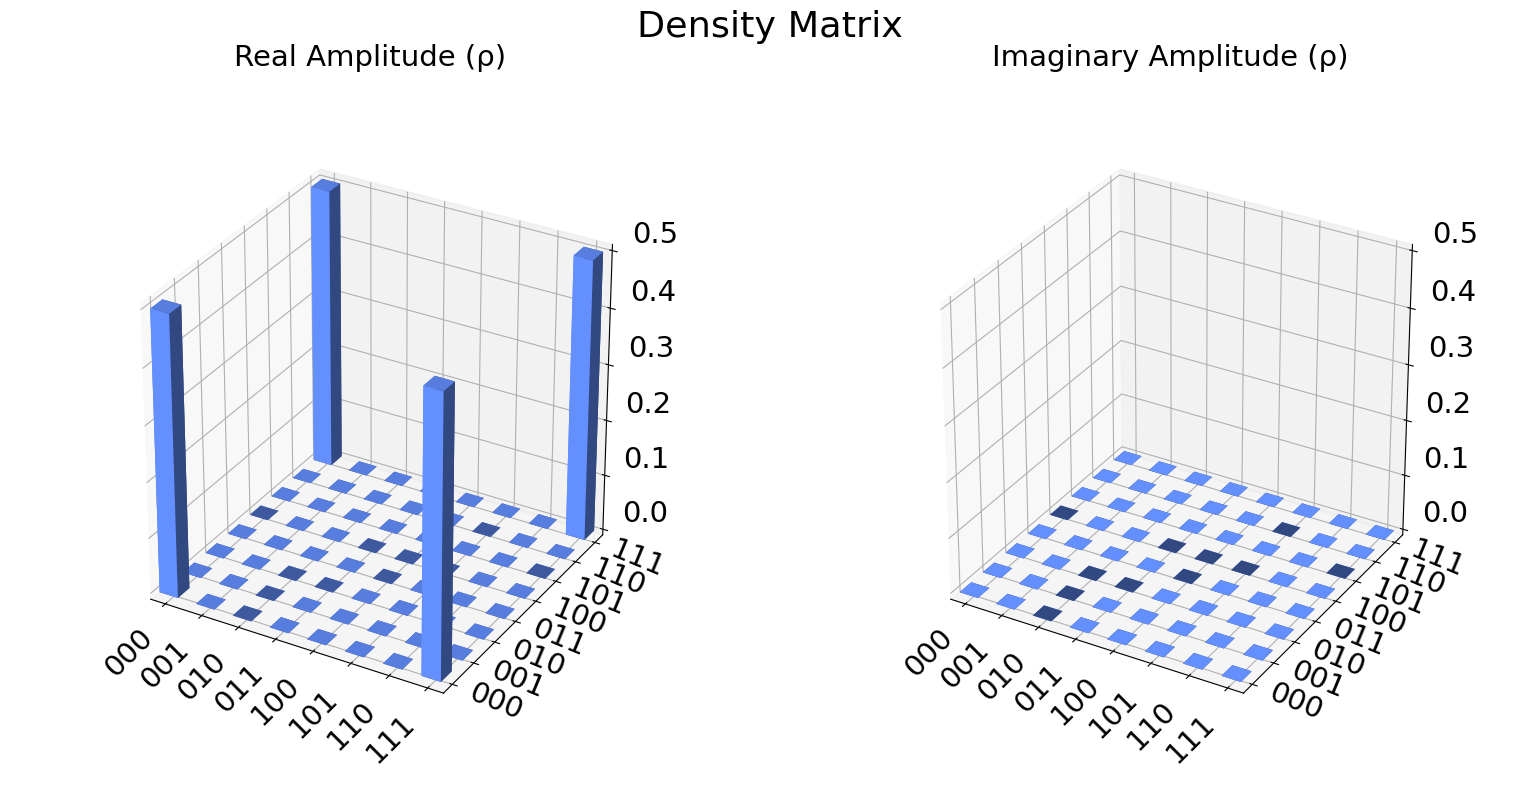

In [7]:
plot_state_city(rho_ABC.data, title='Density Matrix')

In [9]:
rho_H_matrix = np.array([[1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2]])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

## Unitary Evolution of Density Matrix

In [10]:
rho_0 = 1/3*qi.DensityMatrix.from_label('1') + 2/3*qi.DensityMatrix.from_label('+')
rho_0.draw('latex', prefix='\\rho_0 = ')

<IPython.core.display.Latex object>

In [11]:
from qiskit.visualization import array_to_latex

# Pauli-Y operator
Y = qi.Operator.from_label('Y')
array_to_latex(Y.data, prefix='Y =')

<IPython.core.display.Latex object>

In [12]:
rho_0p = rho_0.evolve(Y)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

<IPython.core.display.Latex object>

## State Purity

In [13]:
rho_p = qi.DensityMatrix.from_label('+')
display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

<IPython.core.display.Latex object>

State purity:  1.0


In [14]:
rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('1'))
display(rho_m.draw('latex', prefix='\\rho_m = '))
gamma_m = rho_m.purity()
print("State purity: ", np.round(np.real(gamma_m),3))

<IPython.core.display.Latex object>

State purity:  0.5


### Non-uniqueness <a id="non_uniqueness"></a>

One of the drawbacks of representing the density matrices in terms of ensembles of basis states, is that their outcome is not unique. Consider, for example, the following two mixed states:

$$
\rho_{m1} = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | \quad \text{and} \quad \rho_{m2} = \frac{1}{2} | + \rangle \langle + | + \frac{1}{2} | - \rangle \langle - | 
$$

These are clearly mixtures of different pure states; however, if we express $\rho_{m2} $ in the computational basis, we get:

$$ 
\begin{aligned}
\rho_{m2} & = \frac{1}{2} \left ( \frac{1}{\sqrt{2}} \left( | 0 \rangle + | 1 \rangle \right ) \frac{1}{\sqrt{2}} \left( \langle 0 | + \langle 1 | \right ) \right ) + \frac{1}{2} \left ( \frac{1}{\sqrt{2}} \left( | 0 \rangle - | 1 \rangle \right ) \frac{1}{\sqrt{2}} \left( \langle 0 | - \langle 1 | \right ) \right )
\\
\\
& = \frac{1}{4} \left ( | 0 \rangle \langle 0 | + | 0 \rangle \langle 1 | + | 1 \rangle \langle 0 | + | 1 \rangle \langle 1 | \right ) + \frac{1}{4} \left ( | 0 \rangle \langle 0 | - | 0 \rangle \langle 1 | - | 1 \rangle \langle 0 | + | 1 \rangle \langle 1 | \right )
\\
\\
& = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 |,
\end{aligned}
$$

which is identical to $\rho_{m1}$. Understanding that the same density matrix can represent many different ensembles of quantum states is important to avoid drawing conclusions about a particular system simply based on its density matrix representation alone. For example, if we were to sample quantum states from the system described by $\rho_{m1}$, we will get different states than if we were to sample $\rho_{m2}$ ($|0 \rangle $ or $|1 \rangle $ vs. $|+ \rangle $ or $|- \rangle $). So, even though these density matrices correctly capture the outcome probabilities of $\rho_{m1}$ and $\rho_{m2}$ upon measurement, care must be taken when using this representation if subtleties of a system must be understood.

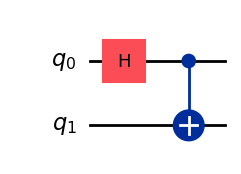

In [15]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
qc_AB.draw('mpl')

In [17]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

In [18]:
rho_B = qi.partial_trace(rho_AB,[1])
rho_A = qi.partial_trace(rho_AB,[0])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Visualization of density matrix on block sphere

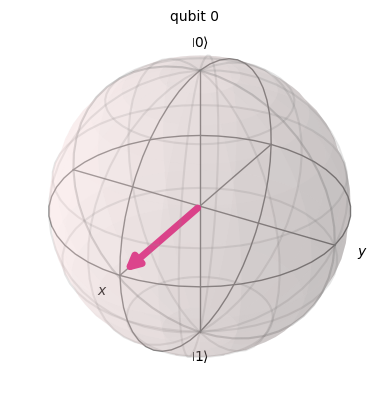

In [19]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(rho_H.data)

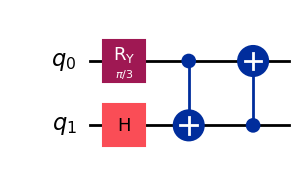

In [21]:
qc_CD = QuantumCircuit(2)
qc_CD.ry(np.pi/3,0)
qc_CD.h(1)
qc_CD.cx(0,1)
qc_CD.cx(1,0)
qc_CD.draw('mpl')

In [22]:
psi_CD = qi.Statevector.from_instruction(qc_CD)
psi_CD.draw('latex', prefix='|\\psi_{CD}\\rangle =')

<IPython.core.display.Latex object>

In [23]:
rho_CD = qi.DensityMatrix.from_instruction(qc_CD)
rho_CD.draw('latex', prefix='\\rho_{CD} =')

<IPython.core.display.Latex object>

In [24]:
rho_D = qi.partial_trace(rho_CD,[0])
rho_C = qi.partial_trace(rho_CD,[1])

display(rho_D.draw('latex', prefix=" \\rho_{D} = "),
        rho_C.draw('latex', prefix=" \\rho_{C} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

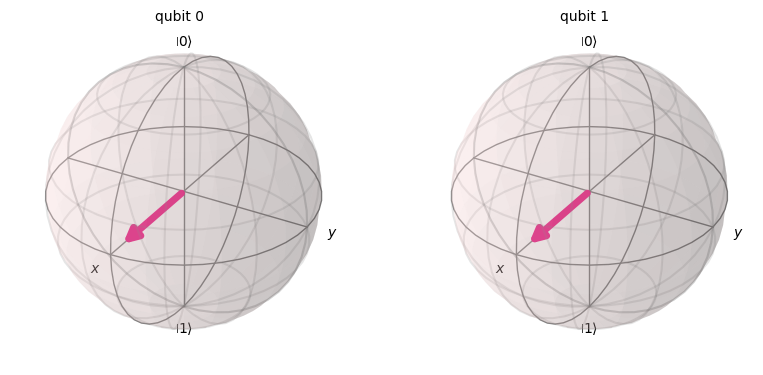

In [25]:
plot_bloch_multivector(rho_CD.data)

Understanding the Bloch vector representation for multi-qubit states explains why, when we try to plot a two-qubit maximally entangled state in the Bloch sphere, we get an "empty" plot. Since the reduced density matrices of a state like:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

are given by:

$$ 
\rho_A = \rho_B = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \frac{1}{2} \hat I,
$$

we see that the Bloch vector components `{latex} r_x, r_y, r_z` are all 0. Therefore, $\rho_A$ and $\rho_B$ actually have $\vec r $ vectors of zero length, represented by points at the origin of the sphere:

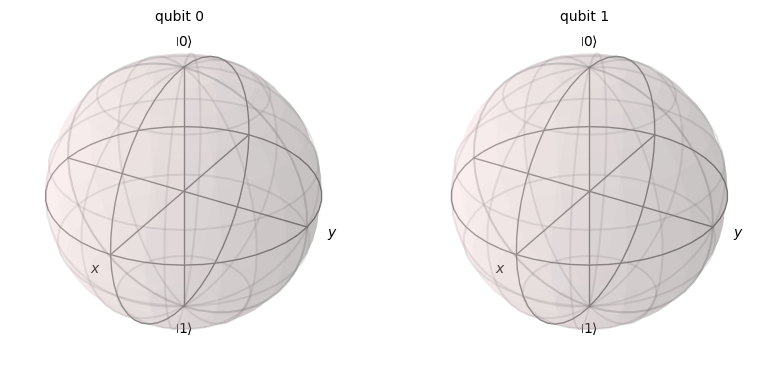

In [26]:
plot_bloch_multivector(rho_AB.data)